# Data exploration "Signs of Surveillance" dataset, by Daniel Buzzo
This file covers the exploration of the "Signs of Surveillance" dataset by Daniel Buzzo. In order to make the dataset useable for Object Detection purposes, the dataset is analysed and cleaned where needed. All images in the dataset are 250x250 pixels and were handmade by Daniel Buzzo and are from over 31 countries in the world. For simplicity sake, all the images have been put together in one folder, instead of multiple seperate folders, ordered by country.

Fot this thesis, the dataset should contain only images that have a clear camera logo in them and should have as few words on them as possible. Even though some of the images have a lot of text in them and also show a camera logo, there seem to be a lot of images that have a lot of text and no camera logo. Therefore the choice has been made to remove all the images containing a certain amount of characters, such that creating the anchor boxes for the dataset will not be too time consuming for this project and will yield the best results. 

On top of that, removing these images with a lot of text, will also enable this dataset to be used for Image Classification tasks instead of only Object Detection tasks.

In [35]:
# Imports
from PIL import Image
from tqdm import tqdm
import os, os.path
import pandas as pd
import matplotlib.pylab as plt
import random
import pytesseract
import glob

In [36]:
# Assign path
folder_images = os.path.basename("F:\Signs_explore\images")

## Resolution check
The first step is to see whether all images are indeed 250x250 pixels. If they are not, they should be removed from the dataset, as this can create problems during training of our future model.

In [37]:
# Create dictionary in with the width and heigth of each image
size_images = dict()
for dirpath, _, filenames in os.walk(folder_images):
    for path_image in filenames:
        image = os.path.abspath(os.path.join(dirpath, path_image))
        with Image.open(image) as img:
            width, heigth = img.size
            size_images[path_image] = {'width': width, 'heigth': heigth}

In [60]:
# Turn to Pandas dataframe
df = pd.DataFrame.from_dict(size_images , orient='index')
df = df.reset_index().rename(columns={"index": "file_Name"})
df

file_Name  width  heigth
0        signs- 1.jpg    250     250
1       signs- 10.jpg    250     250
2      signs- 100.jpg    250     250
3     signs- 1000.jpg    250     250
4     signs- 1001.jpg    250     250
...               ...    ...     ...
1809   signs- 995.jpg    250     250
1810   signs- 996.jpg    250     250
1811   signs- 997.jpg    250     250
1812   signs- 998.jpg    250     250
1813   signs- 999.jpg    250     250

[1814 rows x 3 columns]

In [46]:
# Count values to see anomalies in size
df_values = df.value_counts()
df_values

file_Name        width  heigth
signs- 1.jpg     250    250       1
signs- 438.jpg   250    250       1
signs- 461.jpg   250    250       1
signs- 460.jpg   250    250       1
signs- 46.jpg    250    250       1
                                 ..
signs- 1539.jpg  250    250       1
signs- 1538.jpg  250    250       1
signs- 1537.jpg  250    250       1
signs- 1536.jpg  250    250       1
signs- 999.jpg   250    250       1
Length: 1814, dtype: int64

In [47]:
# Find names of the images of size anomalies
df_250 = df[(df['width'] != 250) | (df['heigth'] != 250)]
df_250

file_Name  width  heigth
593   signs- 1532.jpg    188     250
1006   signs- 271.jpg    188     250
1007   signs- 272.jpg    188     250
1171    signs- 42.jpg    250     235
1226    signs- 47.jpg    250     188
1401   signs- 627.jpg    188     250
1461   signs- 681.jpg    250     188
1621   signs- 825.jpg    250     211

## Text in images
Now that the images with an abnormal aspect ratio have been removed, it is time to look at the images visualy and get a feeling of what kind of images are currently in the dataset.

C:\Users\Kishan\AppData\Local\Temp/ipykernel_12172/1757696118.py:11: MatplotlibDeprecationWarning: Passing non-integers as three-element position specification is deprecated since 3.3 and will be removed two minor releases later.
  plt.subplot(len(image_list) / columns + 1, columns, i + 1)


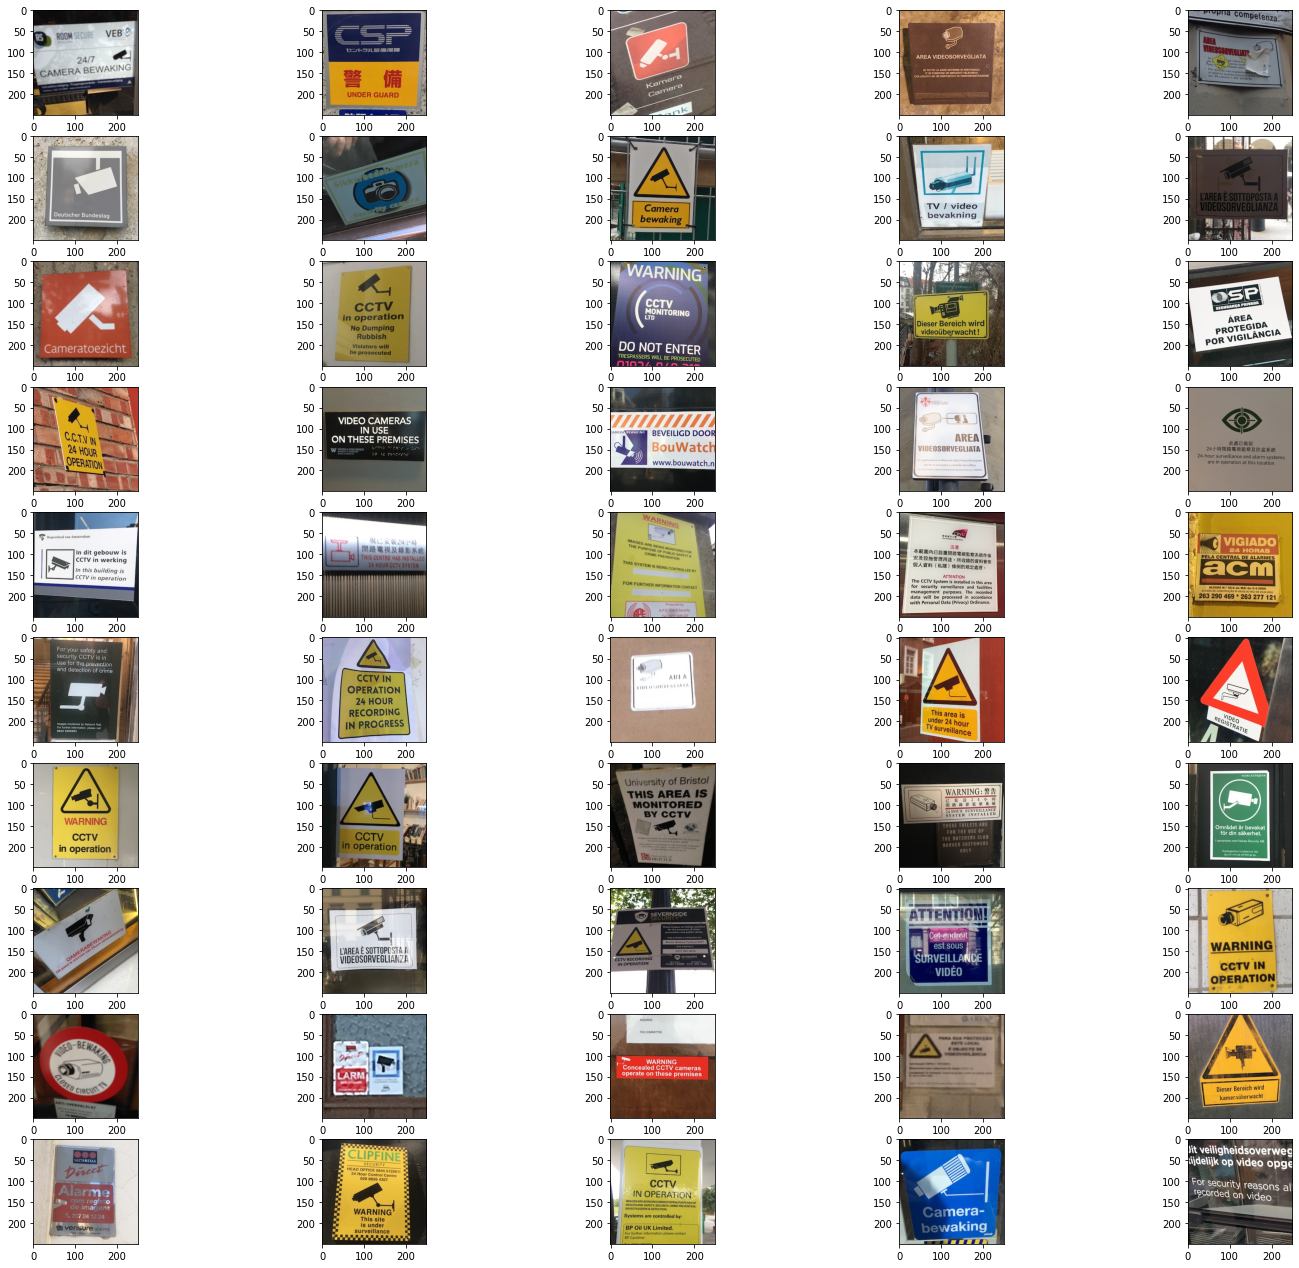

In [48]:
# Function to inspect a random sample of images
image_list = []
for filename in glob.glob('F:/Signs_explore/images/*.jpg'): #assuming gif
    im=Image.open(filename)
    image_list.append(im)

image_list = random.sample(image_list, 50)   
plt.figure(figsize=(25,25))
columns = 5
for i, image in enumerate(image_list):
    plt.subplot(len(image_list) / columns + 1, columns, i + 1)
    plt.imshow(image)

### Bad training data analysis
The dataset currently seems to have a lot of images, that have a very small or no camera logo in them. These images are not that useful for training, since they can mess up the results of the Object Detection model that will be used in the future. To find these images, PyTesseract will be used to find the text in images. Three approaches will be used, namely a conservative approach, a middle approach and a rough approach.

The approaches use character counts instead of words counts, because PyTesseract often "glues" words together. One word could actually be five seperate words. Therefore, character counts have been used.

In [8]:
# Static function callers
input_dir = r'F:\Signs_explore\images'
pytesseract.pytesseract.tesseract_cmd = r'C:\Program Files\Tesseract-OCR\tesseract'

In [9]:
# Conservative approach
f, t= [], []
for root, dirs, filenames in tqdm(os.walk(input_dir)):
    for filename in filenames:
        try: 
            text = pytesseract.image_to_string(r'F:/Signs_explore/images/' + filename)
            
            # Threshold of 30 characters
            if len(text) > 30:
                f.append(filename)
                t.append(text)
        except:
            continue

df_conservative = pd.DataFrame(list(zip(f, t)),columns=['file_Name','Text'])
df_conservative

1it [04:42, 282.65s/it]


file_Name                                               Text
0    signs- 1000.jpg  ,\nPay & Display Car Park\nVehicles must be pa...
1    signs- 1001.jpg  THIS AREA IS MONITOREL\nBYCCTVCAMERAS\n\nWARNI...
2    signs- 1012.jpg  = =a" a\nBeveiligd door\n\nVideocamera\n\n‘obs...
3    signs- 1022.jpg           24 UUR\n\nCAMERATOEZICHT\n\nSAFETY a\n\n
4    signs- 1025.jpg  Dit object wordt beveiliga “A.\nQ-cam\n\nSecur...
..               ...                                                ...
496   signs- 971.jpg  2)\n\nrd\n\nC.C.T.V.\n\nRecording\nIn Operatio...
497   signs- 975.jpg      0117 974 8999\n\nwoww.cannonsecurity.co.uke\n
498   signs- 977.jpg  WARNING\nThese premises are\nunder 24hr CCTV\n...
499   signs- 986.jpg  CCTV\n\nCCTV is in operation in\nthis store fo...
500   signs- 988.jpg  WARNING\n\nImages are recorded for the purpose...

[501 rows x 2 columns]

In [10]:
# Middle approach
f, t= [], []
for root, dirs, filenames in tqdm(os.walk(input_dir)):
    for filename in filenames:
        try: 
            text = pytesseract.image_to_string(r'F:/Signs_explore/images/' + filename)
            
            # Threshold of 60 characters
            if len(text) > 60:
                f.append(filename)
                t.append(text)
        except:
            continue

df_middle = pd.DataFrame(list(zip(f, t)),columns=['file_Name','Text'])
df_middle

1it [04:35, 275.97s/it]


file_Name                                               Text
0    signs- 1000.jpg  ,\nPay & Display Car Park\nVehicles must be pa...
1    signs- 1001.jpg  THIS AREA IS MONITOREL\nBYCCTVCAMERAS\n\nWARNI...
2    signs- 1025.jpg  Dit object wordt beveiliga “A.\nQ-cam\n\nSecur...
3    signs- 1043.jpg  ARTE BSR 24 NEE\nFABRE ESR AE\n\nA 2-hour surv...
4    signs- 1046.jpg  AMMEN MLR RARE\nRAMS + HINA ete\n\nATO (ARB) H...
..               ...                                                ...
223   signs- 911.jpg  CAMERA BEVEILIGING\n\nLe SECUCAM TECHNIEK\n\nT...
224   signs- 912.jpg  pir TERREIN IS VOORZIEN VAN EEN\n\nCAMERA SYST...
225   signs- 969.jpg  ey\n\nve ure\n\nNEV onl\n\nImages & Audio\n\n{...
226   signs- 986.jpg  CCTV\n\nCCTV is in operation in\nthis store fo...
227   signs- 988.jpg  WARNING\n\nImages are recorded for the purpose...

[228 rows x 2 columns]

In [11]:
# Rough approach
f, t= [], []
for root, dirs, filenames in tqdm(os.walk(input_dir)):
    for filename in filenames:
        try: 
            text = pytesseract.image_to_string(r'F:/Signs_explore/images/' + filename)
            
            # Threshold of 90 characters
            if len(text) > 90:
                f.append(filename)
                t.append(text)
        except:
            continue

df_rough = pd.DataFrame(list(zip(f, t)),columns=['file_Name','Text'])
df_rough

1it [04:42, 282.56s/it]


file_Name                                               Text
0    signs- 1000.jpg  ,\nPay & Display Car Park\nVehicles must be pa...
1    signs- 1046.jpg  AMMEN MLR RARE\nRAMS + HINA ete\n\nATO (ARB) H...
2    signs- 1049.jpg  AUMACREMRRMERAH\nRAR TRAR MMA RIK\nWATS (HIB) ...
3    signs- 1110.jpg  sae Be\n26 RG PAE MB BRB\n‘24-hour surveillanc...
4    signs- 1111.jpg  stm EBS\n26-ANRPA AR BERR Be a we\n\n24-hour s...
..               ...                                                ...
104   signs- 754.jpg  BRRAXS eH\n\nSecurity Cameras in Operation\nea...
105   signs- 857.jpg  against the law to\nmoke in this building\n\nf...
106   signs- 893.jpg  y\n\n{\n- CCTV\n\nImages are being monitored\n...
107   signs- 912.jpg  pir TERREIN IS VOORZIEN VAN EEN\n\nCAMERA SYST...
108   signs- 986.jpg  CCTV\n\nCCTV is in operation in\nthis store fo...

[109 rows x 2 columns]

In [12]:
# Cleaning the Text columns, by removing interpunction and capitals
df_conservative = df_conservative.replace(r'\n',' ', regex=True) 
df_conservative['Text'] = df_conservative['Text'].replace(r'[^\w\s]','', regex=True).str.lower()

df_middle = df_middle.replace(r'\n',' ', regex=True) 
df_middle['Text'] = df_middle['Text'].replace(r'[^\w\s]','', regex=True).str.lower()

df_rough = df_rough.replace(r'\n',' ', regex=True) 
df_rough['Text'] = df_rough['Text'].replace(r'[^\w\s]','', regex=True).str.lower()

### Conservative approach

C:\Users\Kishan\AppData\Local\Temp/ipykernel_12172/2244880665.py:14: MatplotlibDeprecationWarning: Passing non-integers as three-element position specification is deprecated since 3.3 and will be removed two minor releases later.
  plt.subplot(len(image_list) / columns + 1, columns, i + 1)


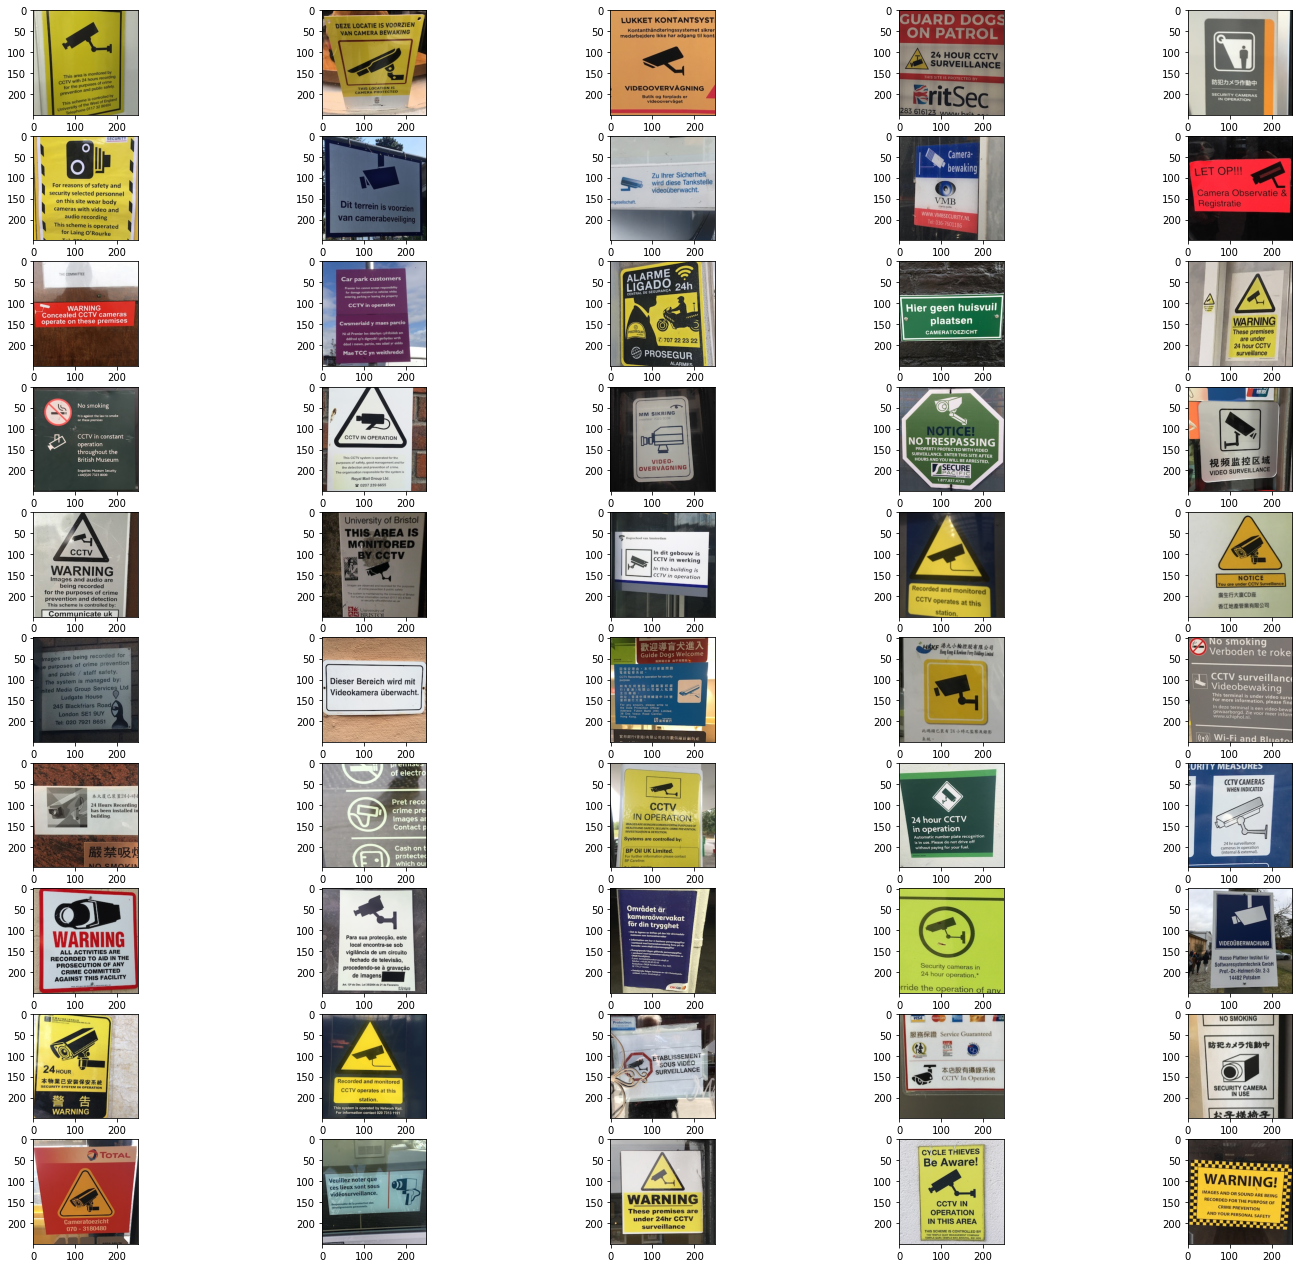

In [13]:
# Fetching names of all the images regarded to fall under the conservative text threshold
col_one_list = df_conservative['file_Name'].tolist()

# Visualy inspect the images that have more than 90 characters in them
image_list = []
for filename in col_one_list:
    im=Image.open('F:/Signs_explore/images/' + filename)
    image_list.append(im)

image_list = random.sample(image_list, 50)   
plt.figure(figsize=(25,25))
columns = 5
for i, image in enumerate(image_list):
    plt.subplot(len(image_list) / columns + 1, columns, i + 1)
    plt.imshow(image)

### Middle approach

C:\Users\Kishan\AppData\Local\Temp/ipykernel_12172/2678342851.py:14: MatplotlibDeprecationWarning: Passing non-integers as three-element position specification is deprecated since 3.3 and will be removed two minor releases later.
  plt.subplot(len(image_list) / columns + 1, columns, i + 1)


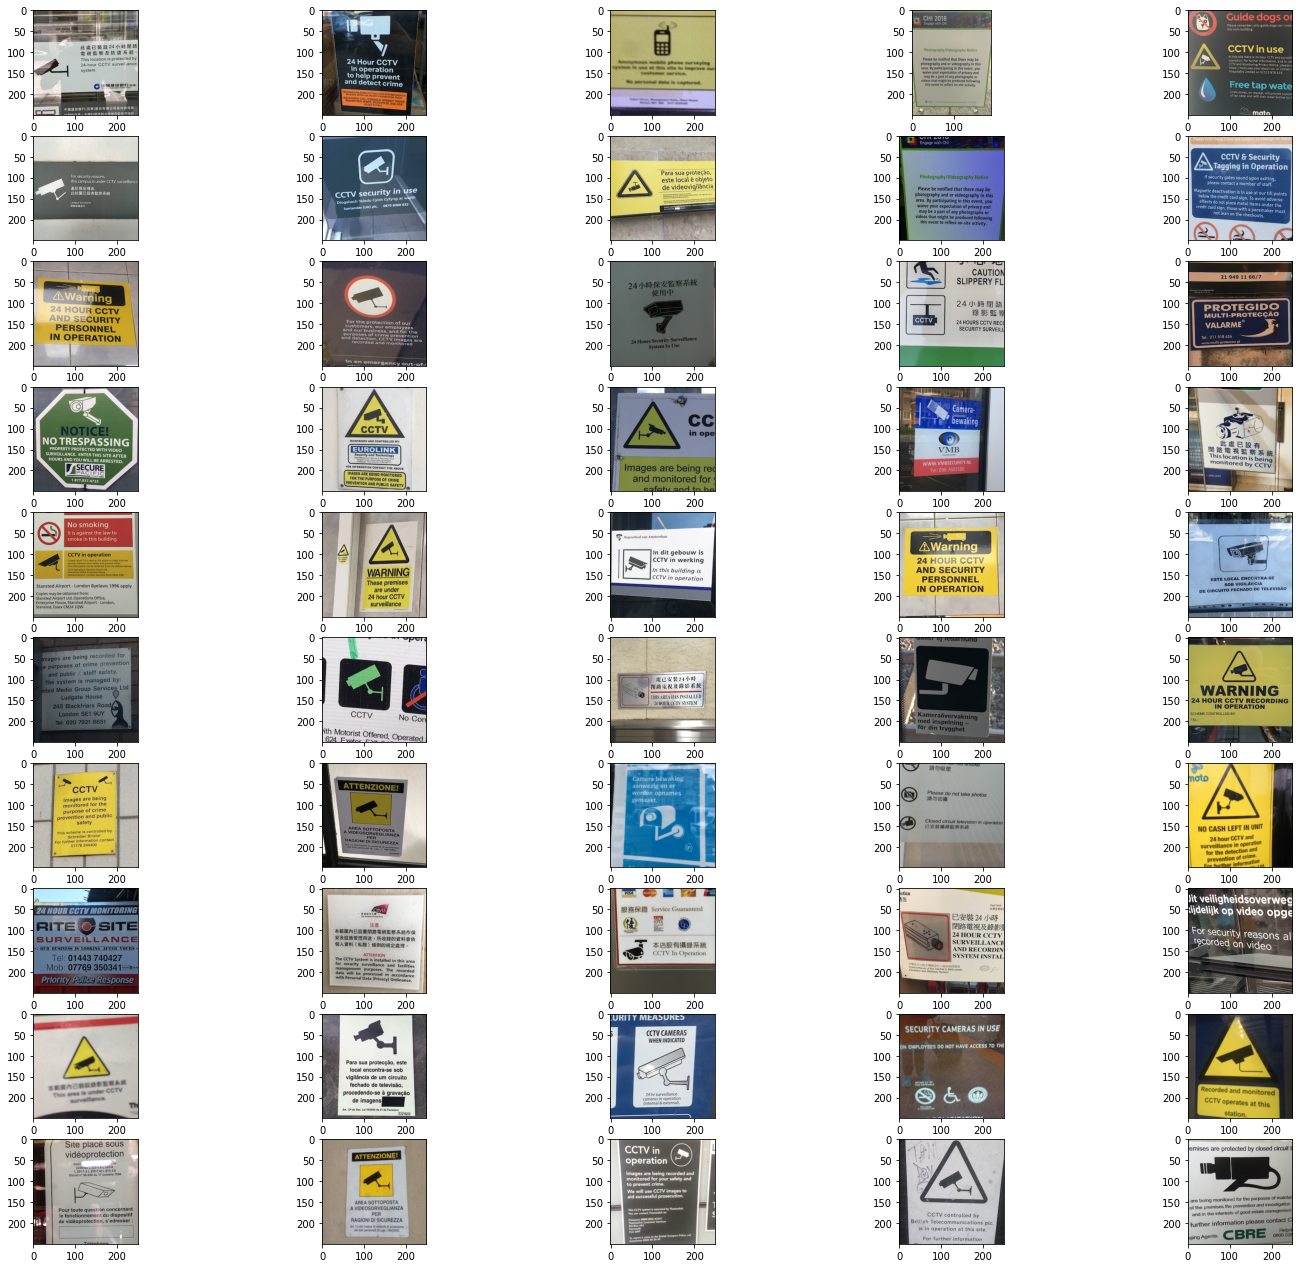

In [14]:
# Fetching names of all the images regarded to fall under the middle text threshold
col_one_list = df_middle['file_Name'].tolist()

# Visualy inspect the images that have more than 90 characters in them
image_list = []
for filename in col_one_list:
    im=Image.open('F:/Signs_explore/images/' + filename)
    image_list.append(im)

image_list = random.sample(image_list, 50)   
plt.figure(figsize=(25,25))
columns = 5
for i, image in enumerate(image_list):
    plt.subplot(len(image_list) / columns + 1, columns, i + 1)
    plt.imshow(image)

### Rough approach

C:\Users\Kishan\AppData\Local\Temp/ipykernel_12172/3420305576.py:14: MatplotlibDeprecationWarning: Passing non-integers as three-element position specification is deprecated since 3.3 and will be removed two minor releases later.
  plt.subplot(len(image_list) / columns + 1, columns, i + 1)


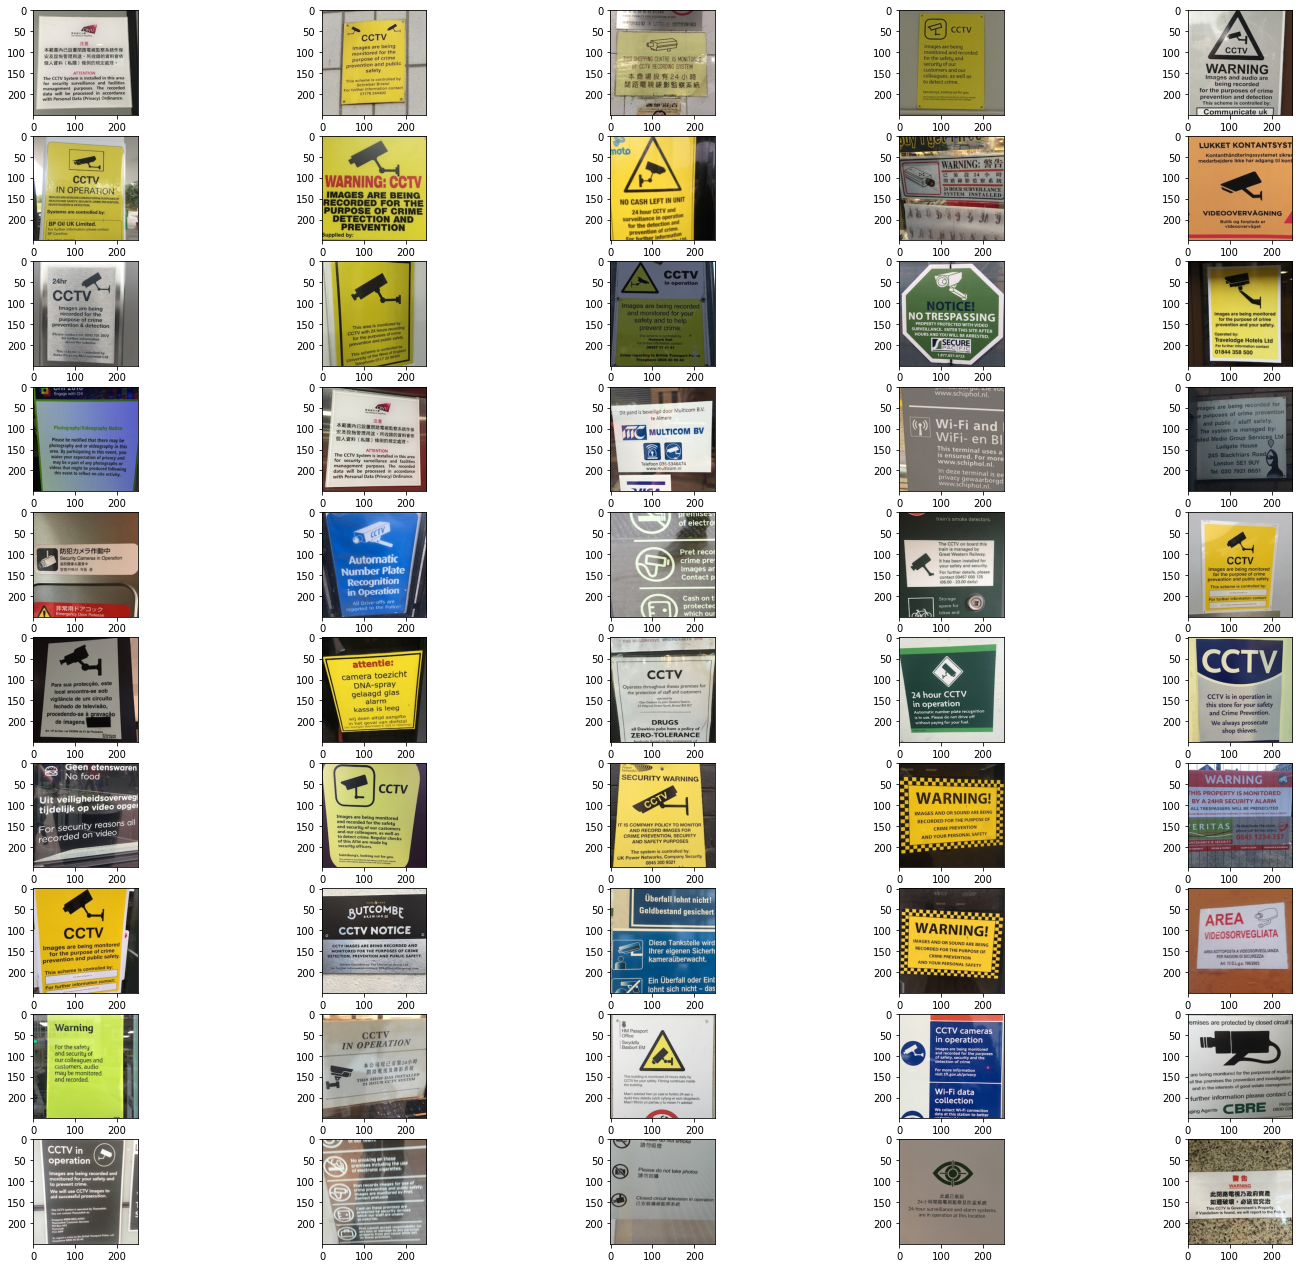

In [15]:
# Fetching names of all the images regarded to fall under the rough text threshold
col_one_list = df_rough['file_Name'].tolist()

# Visualy inspect the images that have more than 90 characters in them
image_list = []
for filename in col_one_list:
    im=Image.open('F:/Signs_explore/images/' + filename)
    image_list.append(im)

image_list = random.sample(image_list, 50)   
plt.figure(figsize=(25,25))
columns = 5
for i, image in enumerate(image_list):
    plt.subplot(len(image_list) / columns + 1, columns, i + 1)
    plt.imshow(image)

## Cleaning analysis
After inspecting each approach, the following has been observed

(1): The conservative approach contains images that have a lot text in them, but there are also a lot of images that have not that much text and a clear camera logo in them. Using this approach for cleaning, could result in the removal of possible good training data.

(2): The middle approach contains images with quite some words in them and camera logos are often very small, compared to the rest of the sign. Most likely, due to the increase in text, the sign has less space for a clear camera logo. There are also a lot images in this approach, that have no camera logo at all in them

(3): The rough approach contains mostly images with a lot of text in them and often have no camera logo in them. If there is a camera logo, it often is very small and simple.

After these observations, it has been decided to remove all the images that fall into the middle approach threshold. After this removal, there is more than enough training data still available, and a lot of bad training data has been removed.

## Cleaned dataset 

In [62]:
middle = df_middle['file_Name'].tolist()
resolution = df_250['file_Name'].tolist()
df = df[~df['file_Name'].isin(middle)]
df = df[~df['file_Name'].isin(resolution)]
final_df = df.reset_index(drop=True)
final_df

file_Name  width  heigth
0        signs- 1.jpg    250     250
1       signs- 10.jpg    250     250
2      signs- 100.jpg    250     250
3     signs- 1002.jpg    250     250
4     signs- 1003.jpg    250     250
...               ...    ...     ...
1574   signs- 995.jpg    250     250
1575   signs- 996.jpg    250     250
1576   signs- 997.jpg    250     250
1577   signs- 998.jpg    250     250
1578   signs- 999.jpg    250     250

[1579 rows x 3 columns]